In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/book-recommendation-dataset/Ratings.csv
/kaggle/input/book-recommendation-dataset/Users.csv
/kaggle/input/book-recommendation-dataset/classicRec.png
/kaggle/input/book-recommendation-dataset/Books.csv
/kaggle/input/book-recommendation-dataset/DeepRec.png
/kaggle/input/book-recommendation-dataset/recsys_taxonomy2.png


In [2]:
books = pd.read_csv('/kaggle/input/book-recommendation-dataset/Books.csv')
users = pd.read_csv('/kaggle/input/book-recommendation-dataset/Users.csv')
ratings = pd.read_csv('/kaggle/input/book-recommendation-dataset/Ratings.csv')

/tmp/ipykernel_33/2910231406.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/kaggle/input/book-recommendation-dataset/Books.csv')


# DATA PREPROCESSING ON BOOKS DATASET

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.shape

(271360, 8)

**FIND THE DUPLICATES**

In [5]:

books.duplicated().sum()

0

**DESCRIBE THE BOOKDATASET**

In [6]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


**ANALIZE THE NULLVALUE IN BOOKS DATASET**

In [8]:

books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

**FILL THE NULL VALUES**

In [9]:

books['Book-Author'] = books['Book-Author'].fillna('Unknown Author')
books['Publisher'] = books['Publisher'].fillna('Unknown Publisher')
books['Image-URL-L'] = books['Image-URL-L'].fillna('No URL')


In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

##  DATA PREPROCESSING ON USERS DATASET

In [11]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
users.shape

(278858, 3)

In [13]:
users.duplicated().sum()

0

In [14]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [16]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [17]:
users = users.drop('Age', axis=1)


In [18]:
users.head()

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


# DATAPREPROCESSING ON RATINGS DATASET

In [19]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [20]:
ratings.shape

(1149780, 3)

In [21]:
ratings.duplicated().sum()

0

In [22]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [23]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [24]:
## change the name of Book-Rating
ratings.rename(columns={'Book-Rating': 'Book_Rating'} , inplace=True)

In [25]:
ratings.head()

,User-ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**There is no null values in ratings datasets**

# PERFORMING UNIVARIENT ON BOOK_RATING COLUMN 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to display summary statistics and visualizations for a numerical column
def univariate_numerical(ratings, Book_Rating):
    print(f'Summary statistics for {Book_Rating}:')
    print(ratings[Book_Rating].describe())
    print(f'Mean: {ratings[Book_Rating].mean()}')
    print(f'Median: {ratings[Book_Rating].median()}')
    print(f'Mode: {ratings[Book_Rating].mode()[0]}')
    print(f'Variance: {ratings[Book_Rating].var()}')
    print(f'Standard Deviation: {ratings[Book_Rating].std()}')
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(ratings[Book_Rating], bins=30, kde=True)
    plt.title(f'Distribution of {Book_Rating}')
    plt.xlabel(Book_Rating)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=ratings[Book_Rating])
    plt.title(f'Box Plot of {Book_Rating}')
    
    plt.show()


Summary statistics for Book_Rating:
count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book_Rating, dtype: float64
Mean: 2.8669501991685364
Median: 0.0
Mode: 0
Variance: 14.854733220530552
Standard Deviation: 3.8541838592016537


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


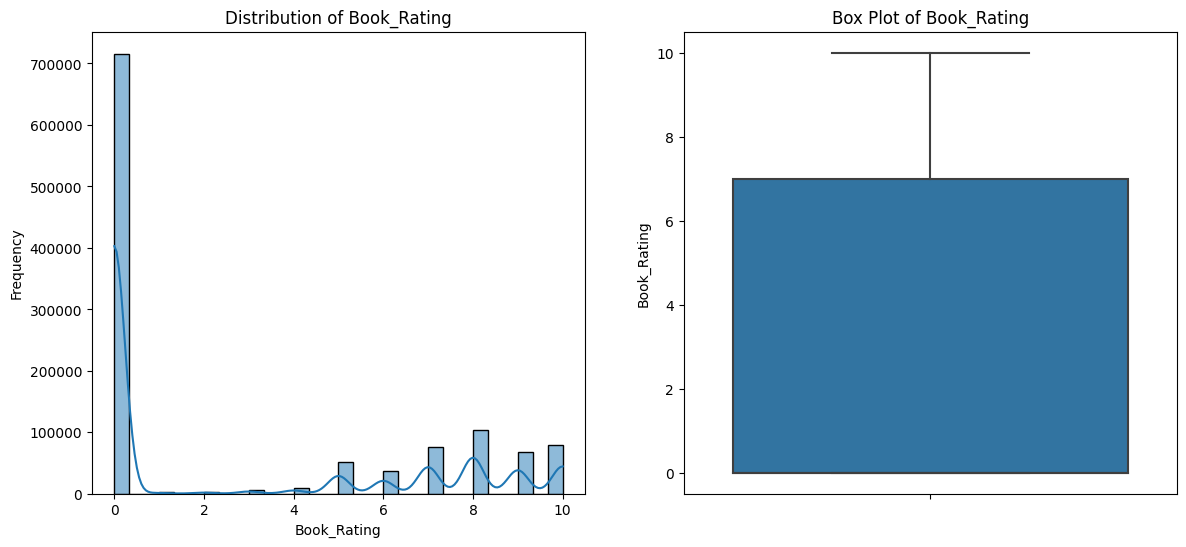

In [27]:
# Univariate analysis for 'Book-Rating' column
univariate_numerical(ratings, 'Book_Rating')

#      Popularity Based Recommender System

In [28]:
# merge the dataframe ratings and books
ratings.merge(books,on='ISBN')

,User-ID,ISBN,Book_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [29]:
ratings.merge(books,on='ISBN').shape

(1031136, 10)

In [30]:
# create new dataframe
ratings_with_books = ratings.merge(books,on='ISBN')

In [31]:
ratings_with_books.head()

,User-ID,ISBN,Book_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [32]:
# Convert 'Book_Rating' to numeric, coercing errors to NaN
ratings_with_books['Book_Rating'] = pd.to_numeric(ratings_with_books['Book_Rating'], errors='coerce')

# Drop rows where 'Book_Rating' is NaN (if any)
ratings_with_books = ratings_with_books.dropna(subset=['Book_Rating'])

In [33]:
ratings_with_books.groupby('Book-Title').count()['Book_Rating'].reset_index()

,Book-Title,Book_Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [34]:
# Group by 'Book-Title' and calculate the mean of 'Book_Rating'
num_ratings_df = ratings_with_books.groupby('Book-Title').count()['Book_Rating'].reset_index()
# Rename 'Book_Rating' column to 'avg_rating'
num_ratings_df.rename(columns={'Book_Rating':'num_rating'},inplace = True)
num_ratings_df

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [35]:
avg_ratings_df = ratings_with_books.groupby('Book-Title').count()['Book_Rating'].reset_index()
avg_ratings_df.rename(columns={'Book_Rating':'avg_rating'},inplace = True)
avg_ratings_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [36]:
popular_df = num_ratings_df.merge(avg_ratings_df,on = 'Book-Title')
popular_df

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,4
1,Always Have Popsicles,1,1
2,Apple Magic (The Collector's series),1,1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,1
4,Beyond IBM: Leadership Marketing and Finance ...,1,1
...,...,...,...
241066,Ã?Â?lpiraten.,2,2
241067,Ã?Â?rger mit Produkt X. Roman.,4,4
241068,Ã?Â?sterlich leben.,1,1
241069,Ã?Â?stlich der Berge.,3,3


**write in short order**

In [37]:
popular_df = popular_df[popular_df['num_rating']>=250].sort_values('avg_rating',ascending=False).head(50)


In [38]:
popular_df

,Book-Title,num_rating,avg_rating
234951,Wild Animus,2502,2502
196326,The Lovely Bones: A Novel,1295,1295
183573,The Da Vinci Code,898,898
5303,A Painted House,838,838
199237,The Nanny Diaries: A Novel,828,828
27922,Bridget Jones's Diary,815,815
206502,The Secret Life of Bees,774,774
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,740
204387,The Red Tent (Bestselling Backlist),723,723
14392,Angels &amp; Demons,670,670


**merge the popular_df with books**

In [39]:
popular_df = popular_df.merge(books ,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title' , 'Book-Author', 'Year-Of-Publication' , 'Image-URL-M', 'num_rating' ,'avg_rating']]

In [40]:
popular_df

,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,num_rating,avg_rating
0,Wild Animus,Rich Shapero,2004,http://images.amazon.com/images/P/0971880107.0...,2502,2502
1,The Lovely Bones: A Novel,Alice Sebold,2002,http://images.amazon.com/images/P/0316666343.0...,1295,1295
2,The Da Vinci Code,Dan Brown,2003,http://images.amazon.com/images/P/0385504209.0...,898,898
8,A Painted House,John Grisham,2001,http://images.amazon.com/images/P/044023722X.0...,838,838
13,The Nanny Diaries: A Novel,Emma McLaughlin,2002,http://images.amazon.com/images/P/0312278586.0...,828,828
15,Bridget Jones's Diary,Helen Fielding,1997,http://images.amazon.com/images/P/0330332775.0...,815,815
21,The Secret Life of Bees,Sue Monk Kidd,2003,http://images.amazon.com/images/P/0142001740.0...,774,774
27,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,http://images.amazon.com/images/P/0060928336.0...,740,740
30,The Red Tent (Bestselling Backlist),Anita Diamant,1998,http://images.amazon.com/images/P/0312195516.0...,723,723
31,Angels &amp; Demons,Dan Brown,2001,http://images.amazon.com/images/P/0671027360.0...,670,670


In [41]:
popular_df.shape

(50, 6)

#    COLLABORATIVE FILTERING BASED RECOMMENDER SYSTEM

In [42]:
## we find that users who do ratings >200
x = ratings_with_books.groupby('User-ID').count()['Book_Rating']>200
shikshit_users = x[x].index

In [43]:
## filter rating of users
filtered_ratings = ratings_with_books[ratings_with_books['User-ID'].isin(shikshit_users)]

In [44]:
 filtered_ratings.groupby('Book-Title').count()['Book_Rating']>=50

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [45]:
# store in a dataframe y
y = filtered_ratings.groupby('Book-Title').count()['Book_Rating']>=50
famous_books=y[y].index

In [46]:
final_ratings=filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [47]:
## this dataframe contain that user who give rating 200 and contain that books whose rating is 50    
dt = final_ratings.pivot_table(index = 'Book-Title' , columns = 'User-ID',values = 'Book_Rating' )

In [48]:
dt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [49]:
dt.fillna(0,inplace = True)

In [50]:
dt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


now datacomes in our original form who contain books name user_id 

# NOW ANALYZING THE DATAFRAME DT

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
# find the simlarity of all boks from each other
similarity_scores=cosine_similarity(dt)

In [53]:
similarity_scores.shape

(706, 706)

In [54]:
import numpy as np

def recommend(book_name):
    # Ensure the book name is correctly matched
    if book_name in dt.index:
        # index fetch
        index = np.where(dt.index == book_name)[0][0]
        similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:11]

        for i in similar_items:
            print(dt.index[i[0]])
    else:
        print(f"Book '{book_name}' not found in the dataset.")




In [55]:
# Example usage
recommend('A Bend in the Road')

A Walk to Remember
The Last Time They Met : A Novel
Sea Glass: A Novel
Angels
Family Album
Cradle and All
Nights in Rodanthe
By the Light of the Moon
The Rescue
Circle of Friends


In [56]:
 recommend('Year of Wonders')

The Eight
A Heartbreaking Work of Staggering Genius
Bridget Jones: The Edge of Reason
Drowning Ruth (Oprah's Book Club)
Midwives: A Novel
The Mists of Avalon
The Sweet Potato Queens' Book of Love
The Pilot's Wife : A Novel
Into the Wild
The Temple of My Familiar


In [57]:
import pickle
pickle.dump(popular_df, open('popular.pkl','wb'))